In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/College/Semester 5/Computer Vision/Project/Jupyter/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im0.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im1.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im10.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im100.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im101.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im102.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im103.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im104.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im105.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im106.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im107.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/archive\test\angry\im108.png
C:/Colleg

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [19]:
train_dir = 'C:/College/Semester 5/Computer Vision/Project/Jupyter/archive/train'
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Jupyter/archive/test'

In [21]:
num_train_folders = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
num_test_folders = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Number of folders (classes) in the train directory: {num_train_folders}")
print(f"Number of folders (classes) in the test directory: {num_test_folders}")

Number of folders (classes) in the train directory: 7
Number of folders (classes) in the test directory: 7


In [23]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [27]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprised: 3171 images

Test Subfolders and Image Counts:
angry: 958 images
disgust: 111 images
fear: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprise: 831 images


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'] * 2,
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215, 831, 1024, 958, 1233, 1247, 111, 1774],
    'Dataset': ['Training'] * 7 + ['Test'] * 7
}

df = pd.DataFrame(data)

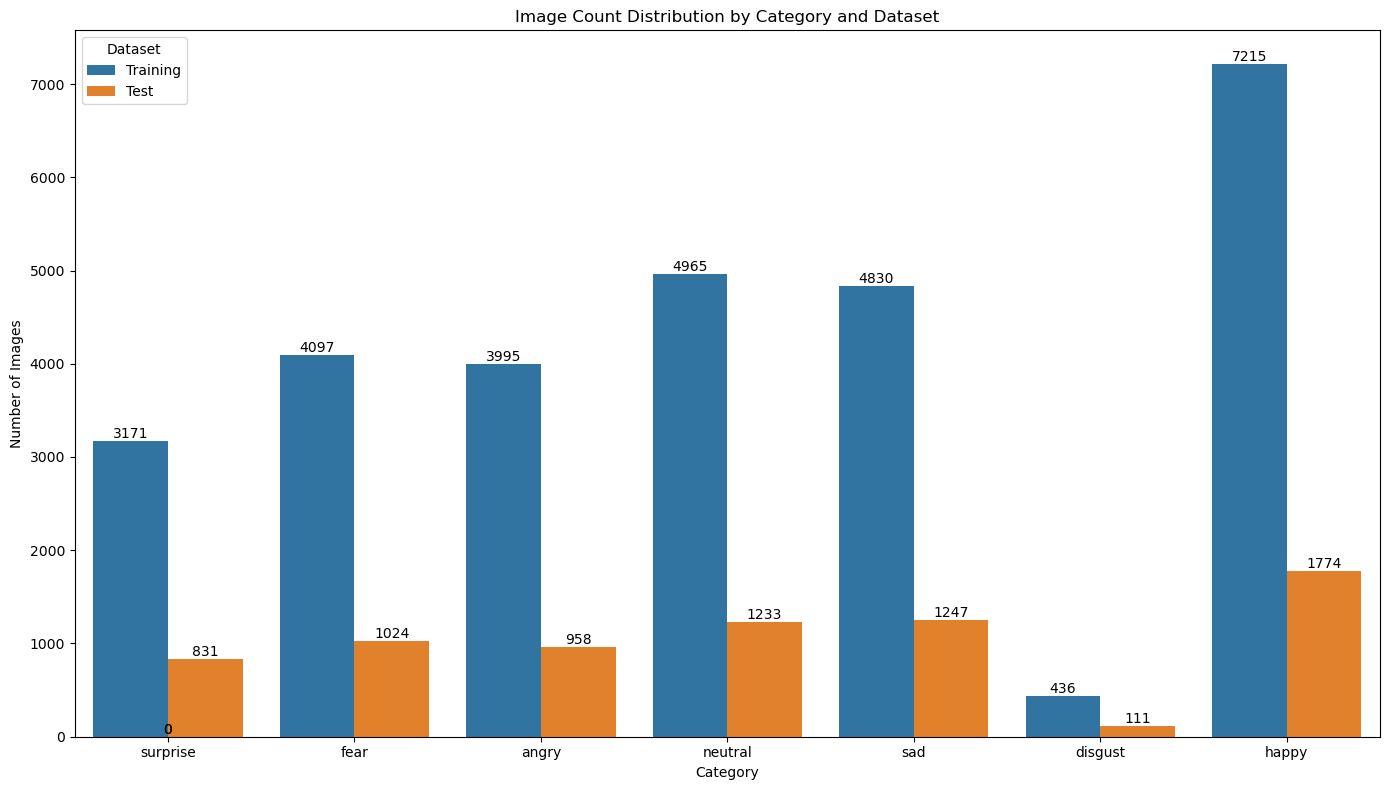

In [33]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Category', y='Count', hue='Dataset', data=df)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Image Count Distribution by Category and Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
train_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215]
}

test_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [831, 1024, 958, 1233, 1247, 111, 1774]
}

df_train = pd.DataFrame(train_counts)
df_test = pd.DataFrame(test_counts)

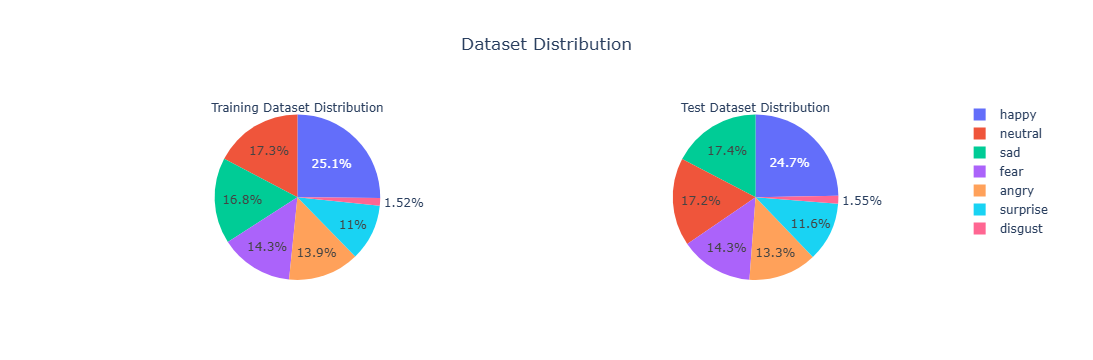

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(
    labels=df_train['Category'],
    values=df_train['Count'],
    name='Training Dataset',
    hoverinfo='label+percent',
    title='Training Dataset Distribution'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=df_test['Category'],
    values=df_test['Count'],
    name='Test Dataset',
    hoverinfo='label+percent',
    title='Test Dataset Distribution'
), row=1, col=2)

fig.update_layout(title_text='Dataset Distribution', title_x=0.5)

fig.show()

In [39]:
total_train = df_train['Count'].sum()
total_test = df_test['Count'].sum()

In [41]:
df_train['Percentage'] = (df_train['Count'] / total_train) * 100
df_test['Percentage'] = (df_test['Count'] / total_test) * 100

print("Training Dataset Percentages:")
for _, row in df_train.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

print("\nTest Dataset Percentages:")
for _, row in df_test.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

Training Dataset Percentages:
Surprise: 11.05%
Fear: 14.27%
Angry: 13.92%
Neutral: 17.29%
Sad: 16.82%
Disgust: 1.52%
Happy: 25.13%

Test Dataset Percentages:
Surprise: 11.58%
Fear: 14.27%
Angry: 13.35%
Neutral: 17.18%
Sad: 17.37%
Disgust: 1.55%
Happy: 24.71%


In [43]:
import cv2

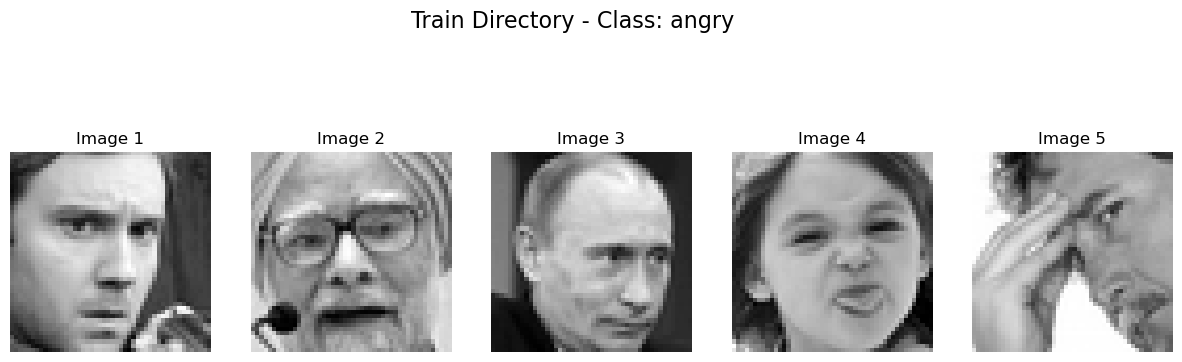

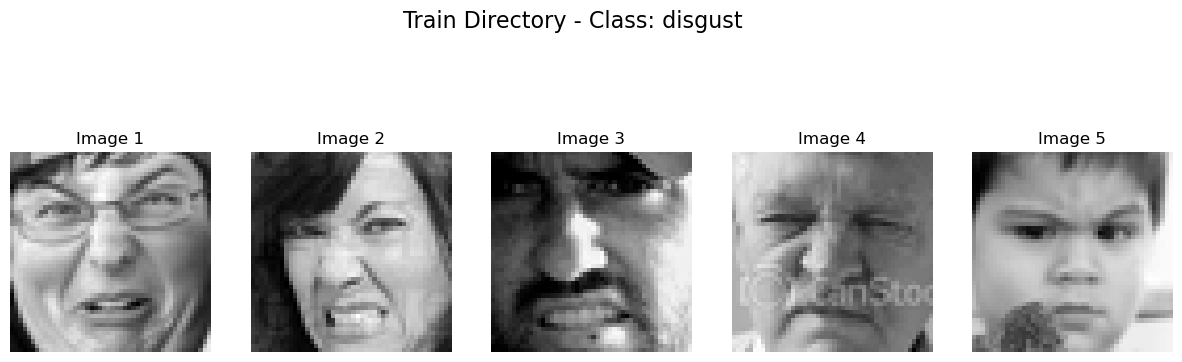

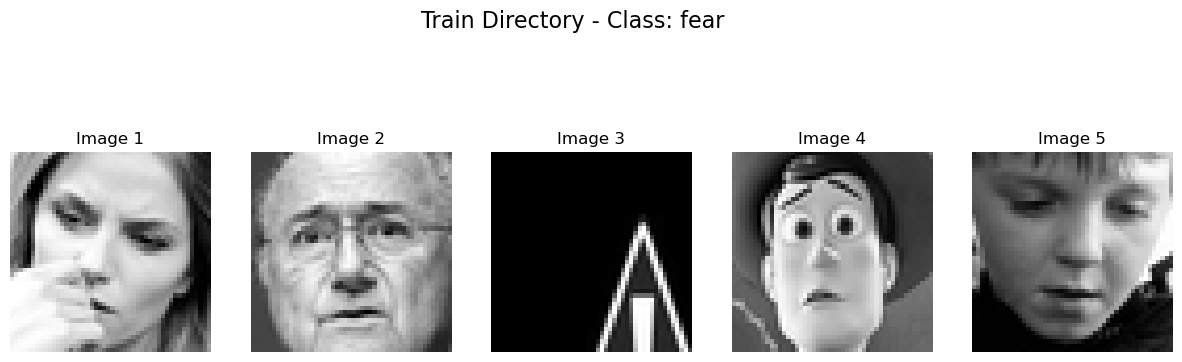

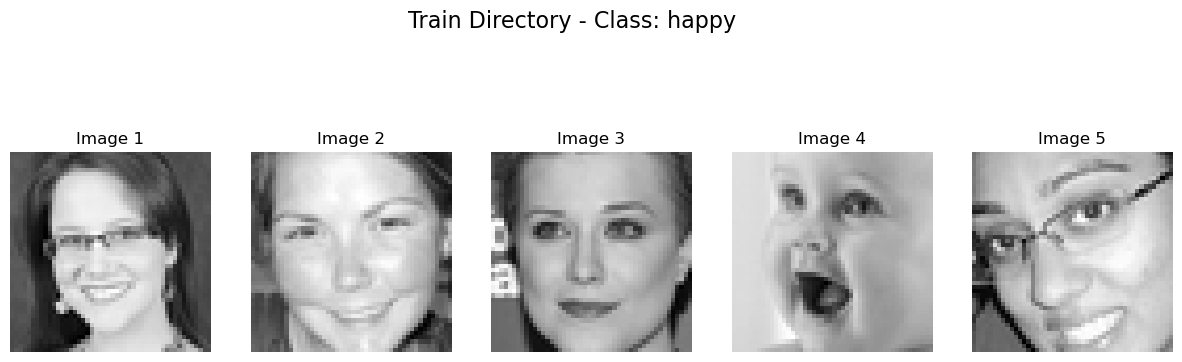

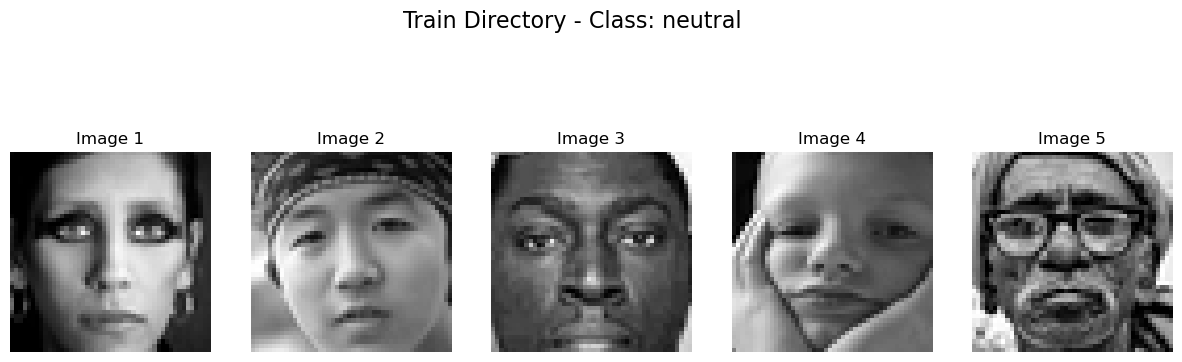

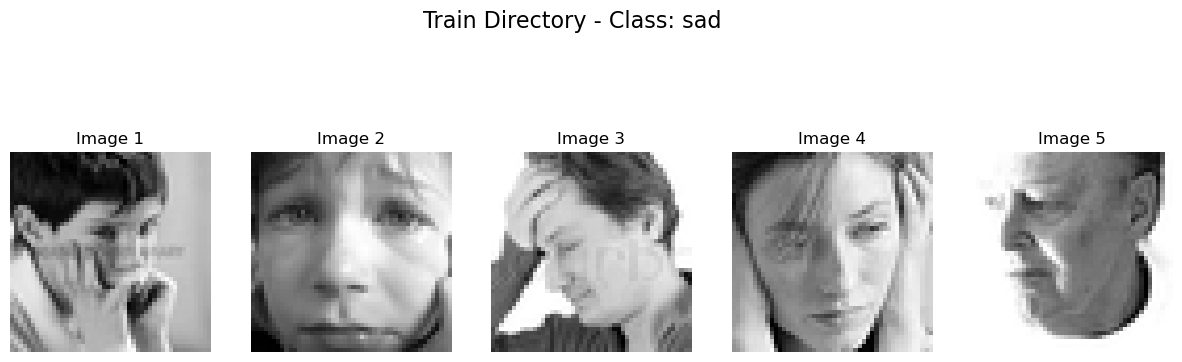

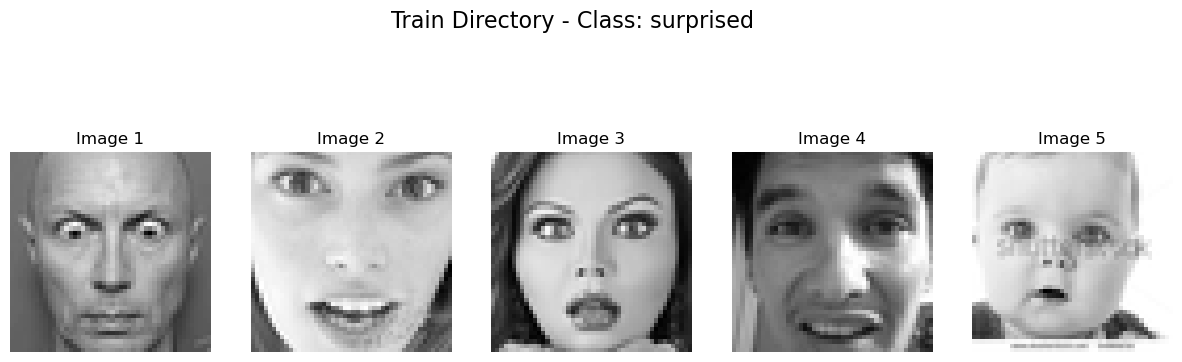

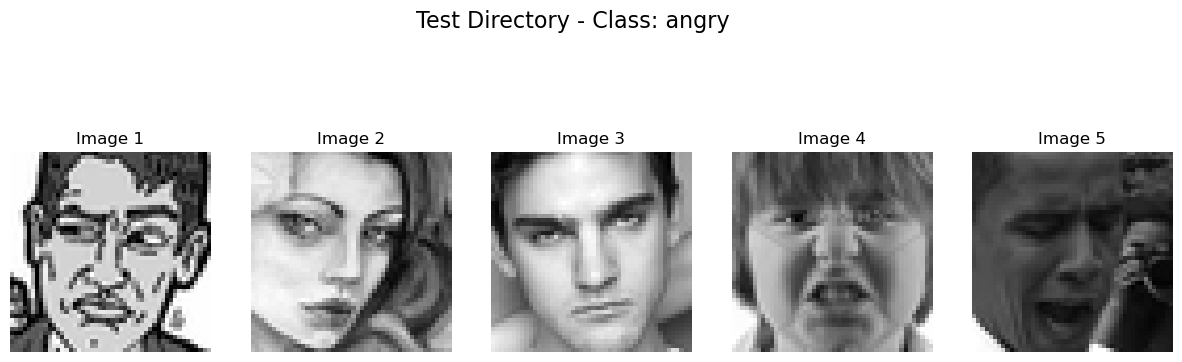

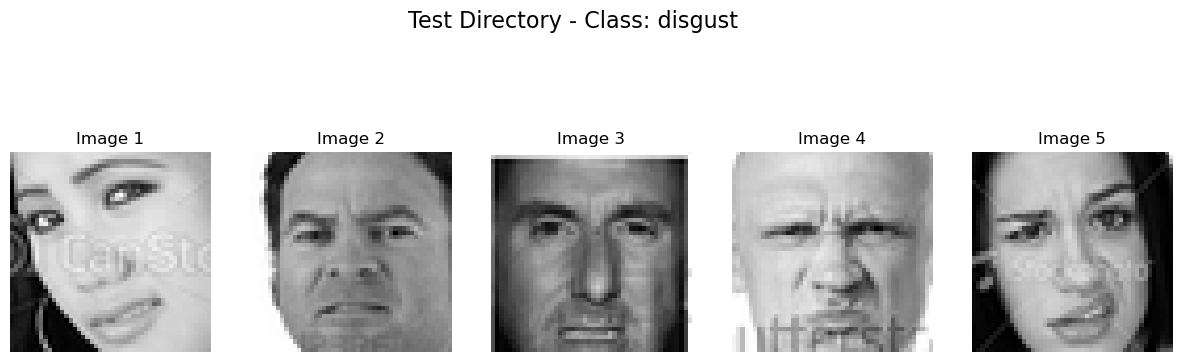

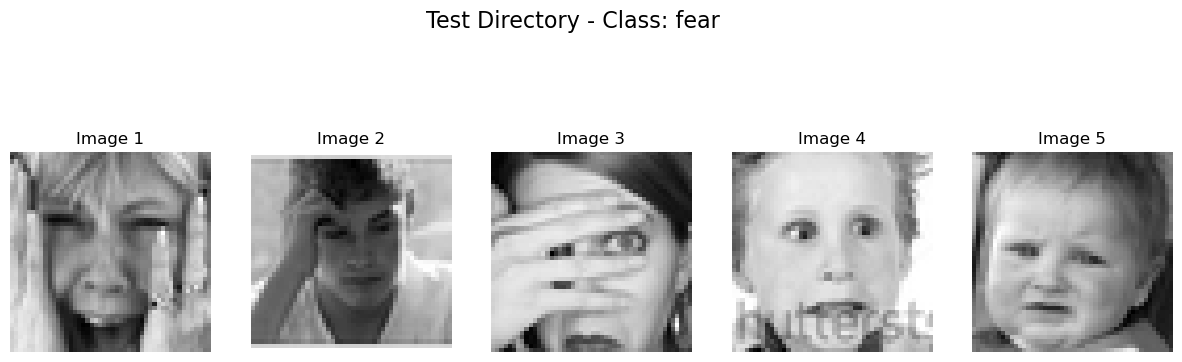

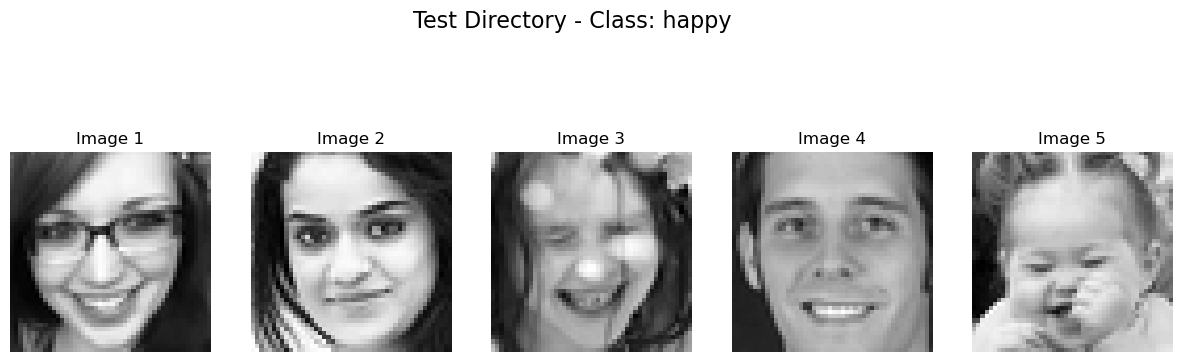

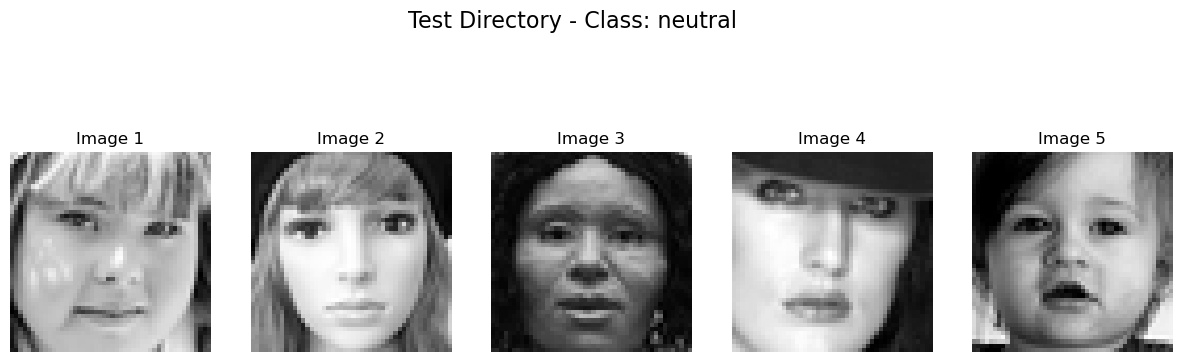

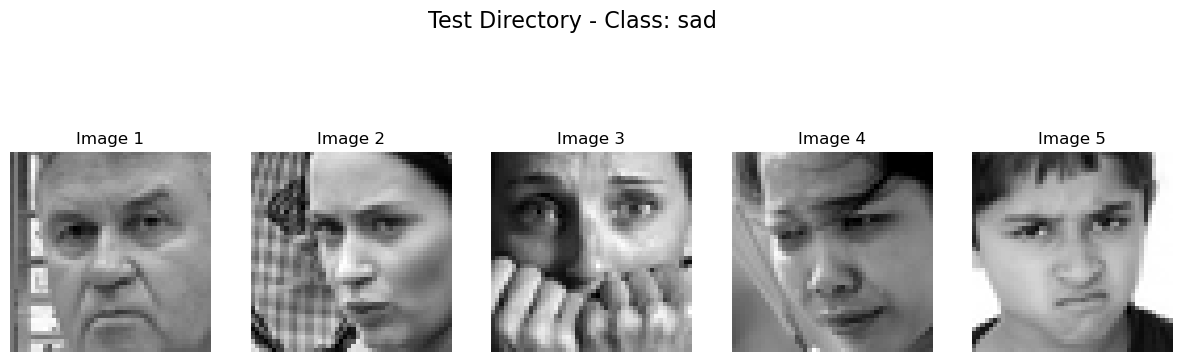

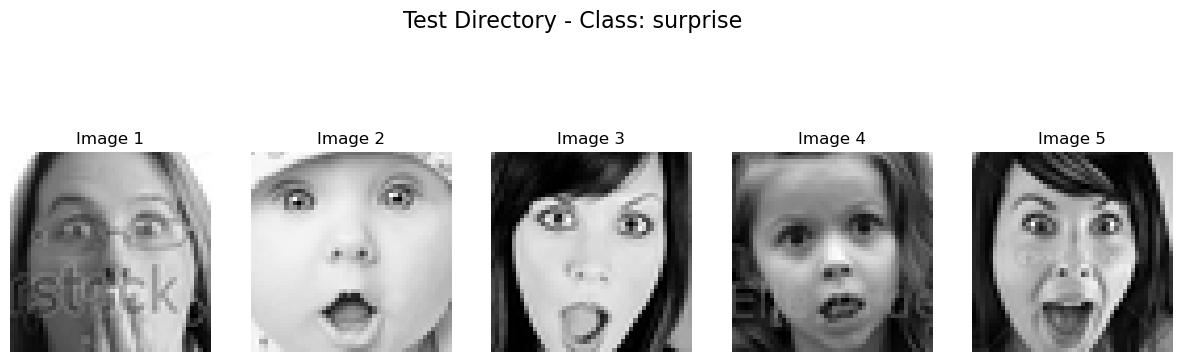

In [47]:
def display_images_from_folders(directory, title):
 
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    for folder in folders:
        folder_path = os.path.join(directory, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"{title} - Class: {folder}", fontsize=16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')  
            axes[i].set_title(f"Image {i+1}")
        
        plt.show()

display_images_from_folders(train_dir, 'Train Directory')

display_images_from_folders(test_dir, 'Test Directory')

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


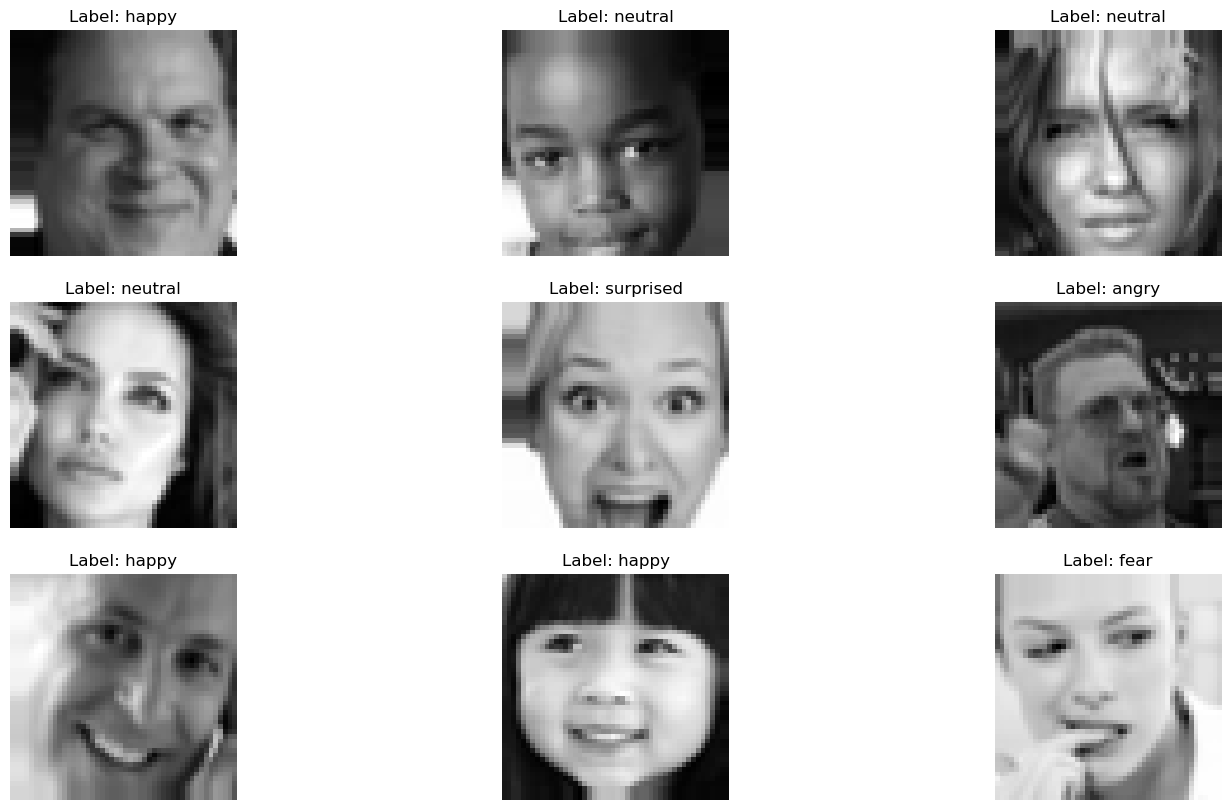

In [53]:
def visualize_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(18, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        label_index = np.argmax(y_batch[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator)

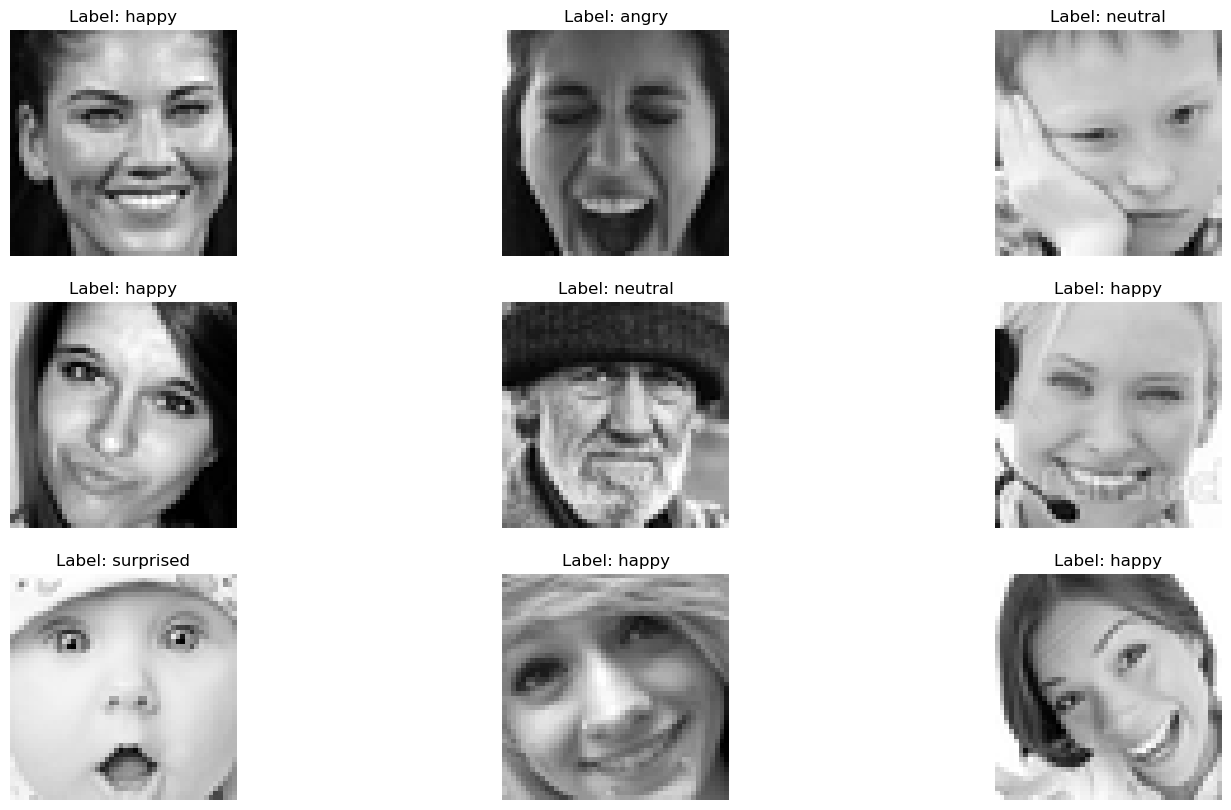

In [55]:
visualize_samples(validation_generator)

In [57]:
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [59]:
train_df

filepaths     labels
0      C:/College/Semester 5/Computer Vision/Project/...      angry
1      C:/College/Semester 5/Computer Vision/Project/...      angry
2      C:/College/Semester 5/Computer Vision/Project/...      angry
3      C:/College/Semester 5/Computer Vision/Project/...      angry
4      C:/College/Semester 5/Computer Vision/Project/...      angry
...                                                  ...        ...
28704  C:/College/Semester 5/Computer Vision/Project/...  surprised
28705  C:/College/Semester 5/Computer Vision/Project/...  surprised
28706  C:/College/Semester 5/Computer Vision/Project/...  surprised
28707  C:/College/Semester 5/Computer Vision/Project/...  surprised
28708  C:/College/Semester 5/Computer Vision/Project/...  surprised

[28709 rows x 2 columns]

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['filepaths']], train_df['labels'])

balanced_train_df = pd.DataFrame({
    'filepaths': X_resampled['filepaths'],
    'labels': y_resampled
})


In [63]:
balanced_train_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
      dtype=object)

In [65]:
balanced_train_df['labels'].value_counts()

labels
angry        7215
disgust      7215
fear         7215
happy        7215
neutral      7215
sad          7215
surprised    7215
Name: count, dtype: int64

In [67]:
balanced_train_df

filepaths     labels
0      C:/College/Semester 5/Computer Vision/Project/...      angry
1      C:/College/Semester 5/Computer Vision/Project/...      angry
2      C:/College/Semester 5/Computer Vision/Project/...      angry
3      C:/College/Semester 5/Computer Vision/Project/...      angry
4      C:/College/Semester 5/Computer Vision/Project/...      angry
...                                                  ...        ...
50500  C:/College/Semester 5/Computer Vision/Project/...  surprised
50501  C:/College/Semester 5/Computer Vision/Project/...  surprised
50502  C:/College/Semester 5/Computer Vision/Project/...  surprised
50503  C:/College/Semester 5/Computer Vision/Project/...  surprised
50504  C:/College/Semester 5/Computer Vision/Project/...  surprised

[50505 rows x 2 columns]

In [69]:
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [71]:
ts_df

filepaths    labels
0     C:/College/Semester 5/Computer Vision/Project/...     angry
1     C:/College/Semester 5/Computer Vision/Project/...     angry
2     C:/College/Semester 5/Computer Vision/Project/...     angry
3     C:/College/Semester 5/Computer Vision/Project/...     angry
4     C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                 ...       ...
7173  C:/College/Semester 5/Computer Vision/Project/...  surprise
7174  C:/College/Semester 5/Computer Vision/Project/...  surprise
7175  C:/College/Semester 5/Computer Vision/Project/...  surprise
7176  C:/College/Semester 5/Computer Vision/Project/...  surprise
7177  C:/College/Semester 5/Computer Vision/Project/...  surprise

[7178 rows x 2 columns]

In [73]:
ts_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [75]:
ts_df['labels'].value_counts()

labels
happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: count, dtype: int64

In [77]:
ros = RandomOverSampler(random_state=42)
X_resampled_ts, y_resampled_ts = ros.fit_resample(ts_df[['filepaths']], ts_df['labels'])

balanced_ts_df = pd.DataFrame({
    'filepaths': X_resampled_ts['filepaths'],
    'labels': y_resampled_ts
})


In [79]:
balanced_ts_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
12413  C:/College/Semester 5/Computer Vision/Project/...  surprise
12414  C:/College/Semester 5/Computer Vision/Project/...  surprise
12415  C:/College/Semester 5/Computer Vision/Project/...  surprise
12416  C:/College/Semester 5/Computer Vision/Project/...  surprise
12417  C:/College/Semester 5/Computer Vision/Project/...  surprise

[12418 rows x 2 columns]

In [81]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [83]:
valid_df, test_df = train_test_split(balanced_train_df,  train_size= 0.2, shuffle= True, random_state= 42)

In [85]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(balanced_train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 50505 validated image filenames belonging to 7 classes.
Found 10101 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


In [87]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [89]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 56,578,887 (215.83 MB)

 Trainable params: 56,576,967 (215.82 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [91]:
model.compile (Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
epochs = 50

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= test_gen, shuffle= False)

Epoch 1/50
 365/3157 ━━━━━━━━━━━━━━━━━━━━ 2:29:57 3s/step - accuracy: 0.1667 - loss: 2.7937

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Menentukan EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Pantau 'val_loss', bisa diganti dengan 'val_accuracy' jika diperlukan
    patience=5,            # Jika tidak ada perbaikan selama 5 epoch, pelatihan dihentikan
    restore_best_weights=True  # Mengembalikan bobot terbaik ketika pelatihan dihentikan
)

# Menambahkan EarlyStopping ke dalam fungsi fit
history = model.fit(
    train_gen, 
    epochs=50,  # Tetap menggunakan 50 epoch
    verbose=1, 
    validation_data=test_gen, 
    shuffle=False,
    callbacks=[early_stopping]  # Menambahkan callback EarlyStopping
)


In [38]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 ━━━━━━━━━━━━━━━━━━━━ 328s 730ms/step - accuracy: 0.3328 - loss: 1.5869
Validation Accuracy: 40.68%


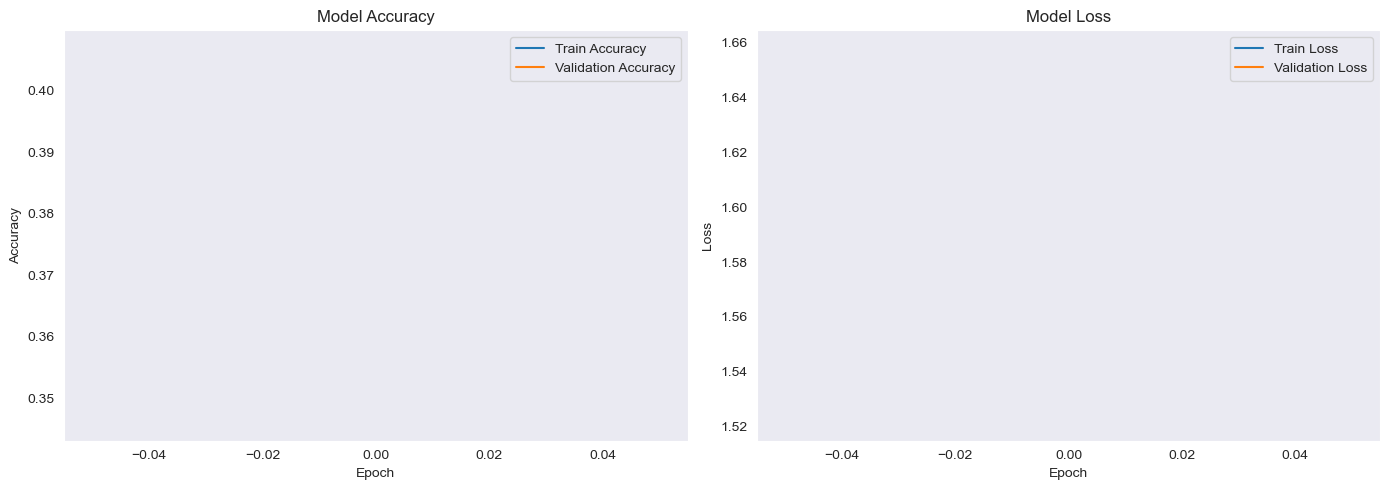

In [39]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

449/449 ━━━━━━━━━━━━━━━━━━━━ 330s 734ms/step


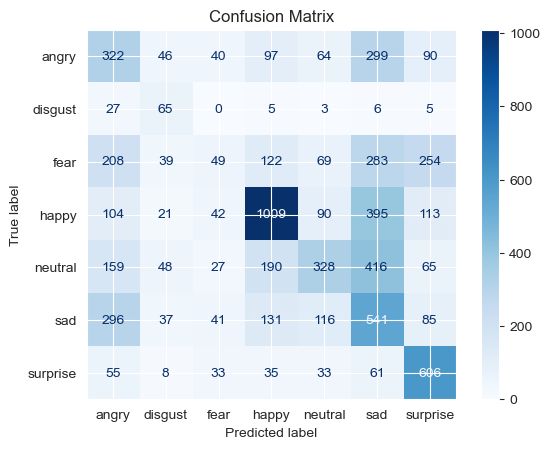

              precision    recall  f1-score   support

       angry       0.27      0.34      0.30       958
     disgust       0.25      0.59      0.35       111
        fear       0.21      0.05      0.08      1024
       happy       0.63      0.57      0.60      1774
     neutral       0.47      0.27      0.34      1233
         sad       0.27      0.43      0.33      1247
    surprise       0.50      0.73      0.59       831

    accuracy                           0.41      7178
   macro avg       0.37      0.42      0.37      7178
weighted avg       0.41      0.41      0.39      7178



In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen.classes
predicted_labels = model.predict(test_gen)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())






disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen.class_indices.keys())
print(report)

In [41]:
# Save the model
model.save('child_emotion_detection_model.h5')

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a ResNet block
def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
epochs = 10
history = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)

Epoch 1/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1367s 430ms/step - accuracy: 0.1841 - loss: 1.9815 - val_accuracy: 0.3271 - val_loss: 1.6634
Epoch 2/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1402s 444ms/step - accuracy: 0.3629 - loss: 1.5956 - val_accuracy: 0.4191 - val_loss: 1.4198
Epoch 3/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1526s 484ms/step - accuracy: 0.4488 - loss: 1.3553 - val_accuracy: 0.5122 - val_loss: 1.2106
Epoch 4/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1517s 480ms/step - accuracy: 0.5091 - loss: 1.2333 - val_accuracy: 0.4764 - val_loss: 1.3885
Epoch 5/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 3385s 1s/step - accuracy: 0.5628 - loss: 1.1273 - val_accuracy: 0.6008 - val_loss: 1.0184
Epoch 6/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1191s 377ms/step - accuracy: 0.6130 - loss: 1.0273 - val_accuracy: 0.6510 - val_loss: 0.9248
Epoch 7/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1183s 375ms/step - accuracy: 0.6526 - loss: 0.9485 - val_accuracy: 0.7019 - val_loss: 0.8080
Epoch 8/10
3157/3157 ━━━━━━━━━━━━━━━━━━━━ 1208s 383ms/step

In [45]:
test_gen_new = ts_gen.flow_from_dataframe(balanced_ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 12418 validated image filenames belonging to 7 classes.


In [46]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.4601 - loss: 1.8042
Validation Accuracy: 50.45%


In [47]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

777/777 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.4683 - loss: 1.9217
Validation Accuracy: 47.76%


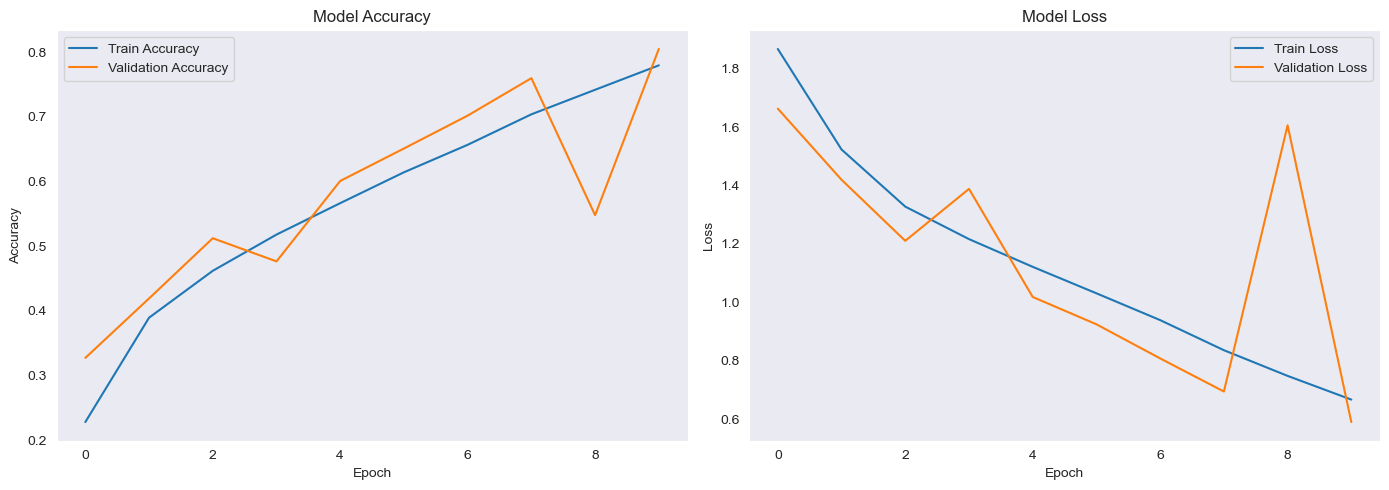

In [48]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

777/777 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step


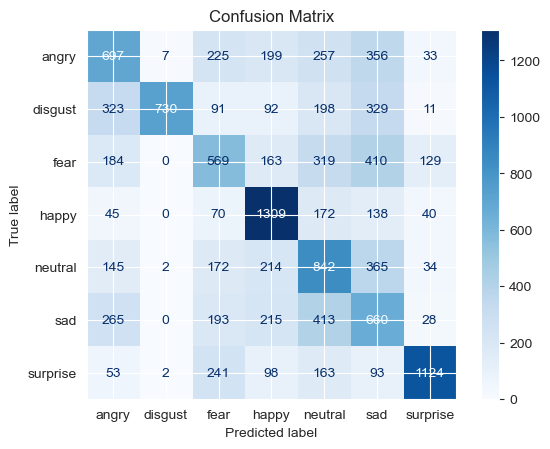

              precision    recall  f1-score   support

       angry       0.41      0.39      0.40      1774
     disgust       0.99      0.41      0.58      1774
        fear       0.36      0.32      0.34      1774
       happy       0.57      0.74      0.64      1774
     neutral       0.36      0.47      0.41      1774
         sad       0.28      0.37      0.32      1774
    surprise       0.80      0.63      0.71      1774

    accuracy                           0.48     12418
   macro avg       0.54      0.48      0.49     12418
weighted avg       0.54      0.48      0.49     12418



In [49]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [50]:
train_df_new, temp_df_new = train_test_split(
    balanced_train_df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=balanced_train_df['labels']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['labels'] 
)

In [51]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_new = tr_gen.flow_from_dataframe(train_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen_new = ts_gen.flow_from_dataframe(valid_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen_new = ts_gen.flow_from_dataframe(test_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 40404 validated image filenames belonging to 7 classes.
Found 5050 validated image filenames belonging to 7 classes.
Found 5051 validated image filenames belonging to 7 classes.


In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 963s 378ms/step - accuracy: 0.1846 - loss: 1.9859 - val_accuracy: 0.3172 - val_loss: 1.6720
Epoch 2/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 978s 387ms/step - accuracy: 0.3472 - loss: 1.6140 - val_accuracy: 0.4081 - val_loss: 1.4332
Epoch 3/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 932s 369ms/step - accuracy: 0.4367 - loss: 1.3775 - val_accuracy: 0.4604 - val_loss: 1.3168
Epoch 4/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 982s 389ms/step - accuracy: 0.4825 - loss: 1.2792 - val_accuracy: 0.4127 - val_loss: 1.5573
Epoch 5/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 936s 370ms/step - accuracy: 0.5266 - loss: 1.1907 - val_accuracy: 0.4889 - val_loss: 1.2592
Epoch 6/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 941s 373ms/step - accuracy: 0.5614 - loss: 1.1004 - val_accuracy: 0.5640 - val_loss: 1.1210
Epoch 7/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 925s 366ms/step - accuracy: 0.6182 - loss: 1.0060 - val_accuracy: 0.5727 - val_loss: 1.1111
Epoch 8/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 893s 354ms/step - ac

In [ ]:
model.save('child_emotion_detection_model.h5')

In [ ]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.7319 - loss: 0.9254
Test Accuracy: 73.71%


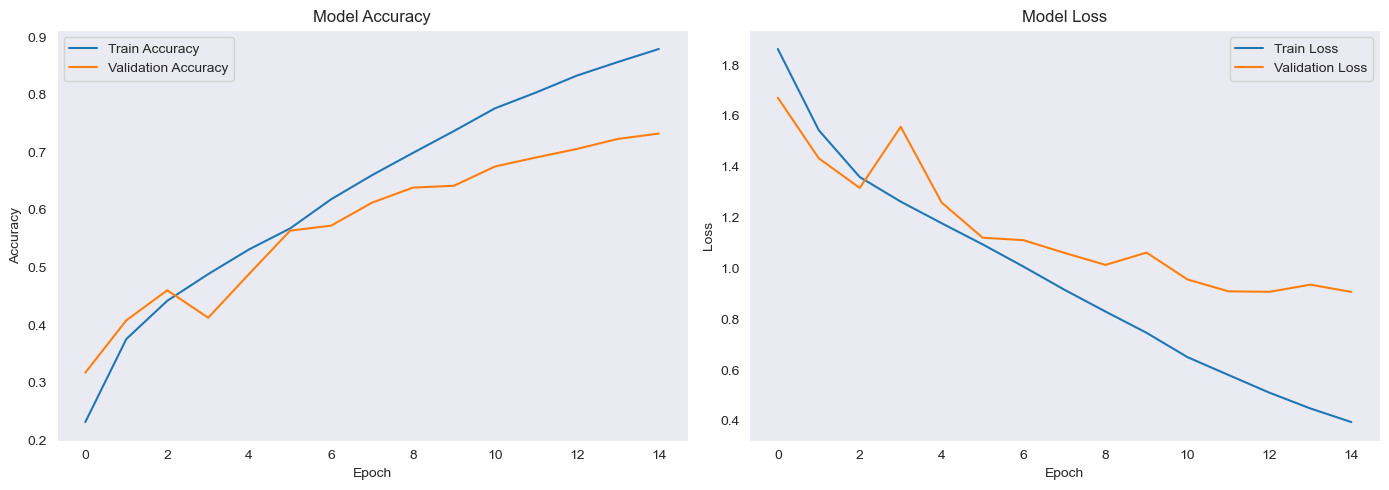

In [ ]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

316/316 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step


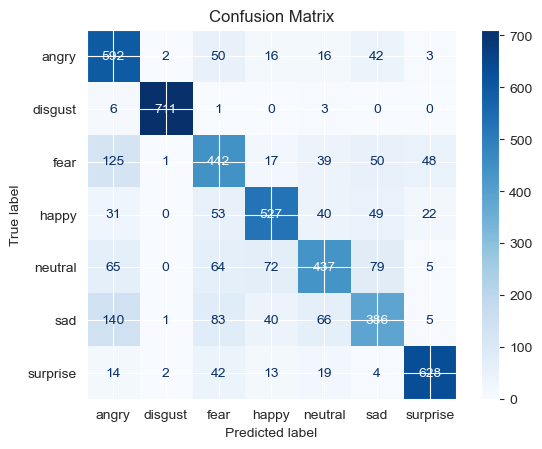

              precision    recall  f1-score   support

       angry       0.61      0.82      0.70       721
     disgust       0.99      0.99      0.99       721
        fear       0.60      0.61      0.61       722
       happy       0.77      0.73      0.75       722
     neutral       0.70      0.61      0.65       722
         sad       0.63      0.54      0.58       721
    surprise       0.88      0.87      0.88       722

    accuracy                           0.74      5051
   macro avg       0.74      0.74      0.74      5051
weighted avg       0.74      0.74      0.74      5051



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [ ]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 56,578,887 (215.83 MB)

 Trainable params: 56,576,967 (215.82 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Save the model
model.save('child_emotion_detection_model.h5')

316/316 ━━━━━━━━━━━━━━━━━━━━ 205s 648ms/step


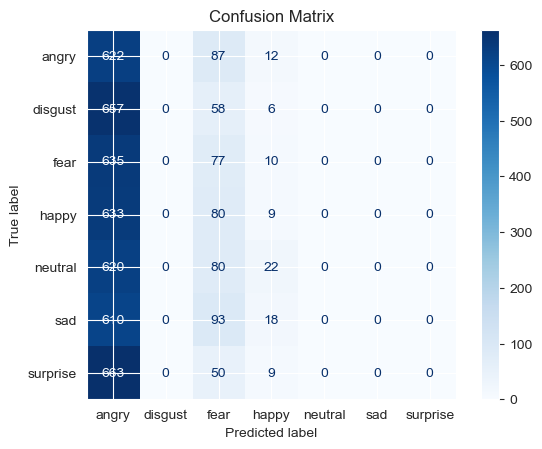

              precision    recall  f1-score   support

       angry       0.14      0.86      0.24       721
     disgust       0.00      0.00      0.00       721
        fear       0.15      0.11      0.12       722
       happy       0.10      0.01      0.02       722
     neutral       0.00      0.00      0.00       722
         sad       0.00      0.00      0.00       721
    surprise       0.00      0.00      0.00       722

    accuracy                           0.14      5051
   macro avg       0.06      0.14      0.06      5051
weighted avg       0.06      0.14      0.06      5051



In [ ]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [ ]:
# Save the model
model.save('child_emotion_detection_model.h5')

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 28, 28, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 56,578,887 (215.83 MB)

 Trainable params: 56,576,967 (215.82 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [2]:
import cv2
import numpy as np

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize camera
cap = cv2.VideoCapture(0)

# Emotion labels corresponding to model's output classes
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Assuming model is already loaded, e.g., model = tf.keras.models.load_model('path_to_model')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face region
        
        # Ensure face is resized properly to match the input size expected by the model
        face = cv2.resize(face, (48, 48))  # Resize to 48x48 or another size expected by your model
        
        # Normalize the pixel values to [0, 1]
        face = face / 255.0
        
        # Add channel and batch dimensions for grayscale (single channel)
        face = np.expand_dims(face, axis=-1)  # Add channel dimension (for grayscale, 1 channel)
        face = np.expand_dims(face, axis=0)  # Add batch dimension (for single image)
        
        # Predict emotion
        predictions = model.predict(face)
        emotion = emotion_labels[np.argmax(predictions[0])]

        # Draw bounding box and label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame with predicted emotion
    cv2.imshow('Child Emotion Recognitional Mental Health', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'model' is not defined

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
##model = tf.keras.models.load_model('child_emotion_detection_model.h5')  # Adjust the path if necessary

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']  # Adjust if you have different labels

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale and resize for model input
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))  # Ensure this matches your model's input size
    face = face / 255.0  # Normalize
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    # Predict emotion
    predictions = model.predict(face)
    max_index = np.argmax(predictions[0])
    emotion = emotion_labels[max_index]

    # Display the resulting frame
    cv2.putText(frame, f'Emotion: {emotion}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow('Child Emotional Detection Mental Health', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()
